# Comparing Ion Drives to Conventional Rockets with Introductory Physics

**A computational essay by John Burk (john.burk@fys.uio.no) and Tor Ole Odden (t.o.odden@fys.uio.no)**

## Introduction

The 2015 movie *The Martian* (and the 2011 book under the same name) tells the story of an astronaut who becomes stranded on Mars and the steps he takes to survive until rescue arrives. 

Interestingly, the rocket used in the movie to get to Mars is not a conventional rocket, which burns fuel to create thrust, but rather something called an *ion drive.* Ion drives use electric fields to accelerate charged particles, launching them out the back of the engine and thereby creating forward thrust. Ion drives are quite exciting because they don't rely on explosions to propel rockets forward, making them potentially both safer and more fuel-efficient than conventional rockets. However, ion drives also produce a much, much smaller thrust than conventional rockets, meaning that they can only really be used once a craft is out in space.

![The Hermes Space Ship, from *The Martian*](Hermes.jpg)

**The Hermes space ship from *The Martian*, via 20th Century Fox**

In the movie, the spacecraft (called The Hermes) makes the trip in two legs of the journey: during the first half of the trip they are constantly burning their engines, accelerating the entire time at a relatively small rate of $2\;\textrm{mm/s}^2$. Then, during the second half of the trip, they turn the rocket around and blast in reverse so that they can slow down. At no point in the journey do they turn off the engines and just coast. 

In principle this seems like a pretty slow way to get to Mars, since the ship will spend much of the first part of the journey inching along as they slowly get up to speed. However, with a few principles and equations from kinematics, along with the computational power of python, we can do some quantiative comparisons to see how effective these ion drives could actually be, as compared to a conventional rocket (in this case, a simplified version of the SpaceX mission to Mars using the [Big Falcon Rocket](https://www.spacex.com/mars)).

## Setting up the Problem

We begin by importing the necessary python packages: matplotlib for plotting and math for, well, math.

In [1]:
import matplotlib.pyplot as plt
from math import *

Now, we define some model parameters. We'll set the distance to Mars as the [average](https://www.space.com/14729-spacekids-distance-earth-mars.html) distance of 225 million km. We will also define the [Hermes' acceleration](https://briankoberlein.com/2015/10/06/the-science-behind-the-martian-hermes-spacecraft/) to be a constant $2\;\textrm{mm/s}^2$. 

In [2]:
marsDist = 225E9 #m
a_Hermes =0.002

We will also make two major simplifying assumptions. First, **we will collapse this 2D problem into a 1D journey from Earth to Mars,** with the spacecraft starting and ending at rest and traveling a distance of 225 million km. Second, **we will ignore the gravitational pull of Earth and Mars.** Note that in actuality one has to account for both of those factors, which necessitates taking the relative orbital distances of Earth and Mars into account and having spacecraft do complex maneuvers like "gravity assists" (both of these factors are thoroughly explored in *The Marian*). In practice, NASA has developed sophisticated software packages to do this kind of simulation. In our case, these simplifications make this a very unphysical problem—we will essentially be comparing how a conventional rocket would do against the Hermes in a deep-space drag race. But, this kind of (over)simplification can be useful for making rough comparisons between ion drives and conventional rockets.

![](Earth-Mars.png)

**Simplified path from Earth to Mars**

## Analytical solutions

### Hermes (Ion Drive)

If we assume that the spacecraft reverses its acceleration at $\frac{d}{2}$, we can algebraically solve for the time it will take Hermes to reach the halfway point, and double that to find the time to reach Mars. 

We begin by calculating the time it takes to reach the halfway point using kinematic equations: 

$$\frac{1}{2}d=x_0+v_0t+\frac{1}{2}at^2$$

Starting with an initial position of 0, and an initial velocity of 0, this equation simplifies to:

$$d=at^2$$

Solving for $t$:

$$t=\sqrt{\frac{d}{a}}$$

This motion is symmetric, so it will take the same time to slow reach Mars, making the total time, $T_{Heremes}$ 

$$T_{Heremes} = 2t = 2\sqrt{\frac{d}{a}}$$

Plugging this in, we get a total time of:

In [3]:
T_Hermes = 2*sqrt(marsDist/a_Hermes) #days
print(T_Hermes/3600/24, 'days')

245.52318791199568 days


So, with a constant acceleration of $2\;\textrm{mm/s}^2$ it will take 245 days for a rocket with an ion drive to reach Mars. 

### Big Falcon Rocket (Conventional Drive)

For comparison, let's consider a simplified version of the SpaceX mission to Mars using the Big Falcon Rocket (BFR). It's difficult to do a direct comparison, since the BFR is meant to escape Earth's gravity while the Hermes is just meant to be used out in space, but it at least provides a standard for comparison. 

We will assume the BFR will accelerate briefly to a maximum speed, and maintain that speed for the journey until it breifly deaccelerates when arriving at Mars. According to the [SpaceX Website](https://www.spacex.com/mars) the BFR will arrive at Mars with a speed of 7.5 km/s so we will take this to be the constant traveling velocity for the trip. In practice, there will also be a few seconds of acceleration and deacceleration at the beginning and end (according to simulations, about about [473s](https://www.spacex.com/mars) of deacceleration once it gets to Mars) but considering the month-long length of the trip, these minutes won't significantly contribute to the overall travel time. Treating this as a constant velocity problem, we then get a travel time of:

In [4]:
v_BFR = 7500
T_BFR = marsDist/v_BFR 

print("BFR travel time:", T_BFR/3600/24, 'days')

BFR travel time: 347.22222222222223 days


The **BFR will take about 347 days to reach Mars, compared to 245 days with an ion drive**—a savings of about 100 days. That's 100 days less of being trapped in a tiny box, 100 days less supplies needed for the trip, and 100 days less radiation exposure (which can really add up over a long space journey). Additionally, the BFR journey also has the downside of exposing the astronauts to much larger accelerations, albeit for relatively short amounts of time, during launch and re-entry. So, for this simplification, the ion drive does appear to be a significantly more efficient way to get to Mars!

## Plotting the Rockets' Journeys

One advantage of computational simulations is that they let us easily visualize data using matplotlib. To visualize these rocket journeys we'll need to create a list to store the velocity and time series data for the Hermes. We can then use a loop to calculate the velocity of the Hermes after each hour (to avoid integration errors), and append every 24th value to our arrays. 

In [5]:
Hermes_v=[]
Hermes_t=[]
T_Hermes_days = T_Hermes/3600/24

t=0
dt = 1 #time steps are in hours
v_Hermes = 0

while t/24 < T_Hermes_days:
    if t/24 < T_Hermes_days/2:
        v_Hermes = v_Hermes + a_Hermes *3600
    else:
        v_Hermes = v_Hermes - a_Hermes *3600 
    t = t + dt
    if t % 24 == 0:
        Hermes_v.append(v_Hermes)
        Hermes_t.append(t/24)

We can do a similar calculation for the conventional rocket. We will need to use a smaller timestep in this calculation since the acceleration and deacceleration phases of the rocket are so short. Although the acceleration and deceleration windows are short, we will include those as well, with a value of $7500 \frac{m}{s} /  473s = 15.8 \frac{m}{s^2}$

In [8]:
BFR_v =[]
BFR_t =[]
BFR_days = T_BFR/3600/24
BFR_accel = 15.8 #m/s/s
BFR_accel_t = 473

t=0
dt=1 #time steps are in seconds
v_BFR = 0

while t/3600/24 < BFR_days:
    if t < BFR_accel_t:
        #update velocity
        v_BFR = v_BFR+BFR_accel*dt
        BFR_v.append(v_BFR)
        BFR_t.append(t/3600/24)
    elif t > T_BFR-BFR_accel_t:
        v_BFR = v_BFR-BFR_accel*dt
        BFR_v.append(v_BFR)
        BFR_t.append(t/3600/24)
    else:
        if t % (3600*24):
            BFR_v.append(v_BFR)
            BFR_t.append(t/3600/24)  #record times in days
    t = t + dt    

Now, we can plot the velocities as functions of time:

Text(0,0.5,'Velocity (m/s)')

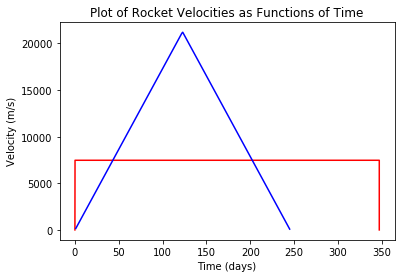

In [9]:
plt.plot(BFR_t,BFR_v,'r',Hermes_t,Hermes_v,'b')
plt.title('Plot of Rocket Velocities as Functions of Time')
plt.xlabel('Time (days)')
plt.ylabel('Velocity (m/s)')

From this graph, we can see why the Hermes performs so much better than the BFR: by the middle of its journey it gets up to a max speed of over 20,000 m/s! Turns out that little acceleration really does add up over time!

It's also worth noting that the acceleration and deacelleration phases of the conventional rocket are very short—a few minutes—and when these drawn on a horizontal scale measured in days they appear nearly vertical. 

## Complicating Factors: A Rocket with Varying Mass

In both of these scenarios, we've made an assumption that the mass of the spacecraft remains constant throughout its journey. Given that the mass of most rockets is fuel, this assumption is not very physical. Using the computational modeling power of python, we can now devise a better model that takes into account the varying rocket mass. To do this we will calculate the initial thrust of the rocket based on the acceleration assumed above, then assume that the thrust stays constant throughout the journey as the rocket ejects mass. This, in turn, will lead to an increasing acceleration.

### Calculating the Hermes' Mass Ejection Rate

To get us started, NASA scientist [Laura Burke](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20150019662.pdf) has done a detailed calculation of a realistic trajectory of the Heremes, taking into account the varying mass of the spacecraft and the motion of Earth and Mars. While the details of these calculations are well beyond the scope of this analysis, we will use her values to create parameters for our simplified 1-D model. Specifically, we'll use her mass parameter for the Hermes (110,000 kg) and fuel mass for the ion drive (126,000 kg).

In [10]:
m_Hermes = 110e3 #kg
m_Fuel = 126e3 #kg

Assuming the acceleration of the Hermes listed above is the initial acceleration, we can now calculate the ship's initial thrust of the rocket using Newton's 2nd law.

In [11]:
Thrust = a_Hermes*(m_Fuel+m_Hermes)

We will assume that this thrust will remain constant (since it is based on the ejection rate of the ions out the back of the ship), while the mass of the rocket decreases. 

In Burke's much more comprehensive paper that calculated a realistic trajectory for the Hermes, she assumed a constant specific impulse of 5000s. Specific Impulse is a commonly used quantity in rocketry, ans is usually abbreviated $I_{sp}$. It is a measure of how effectively a rocket uses propellant or a jet engine uses fuel. By definition, it is the total impulse (or change in momentum) delivered per unit of propellant consume and is dimensionally equivalent to the generated thrust divided by the propellant mass flow rate or weight flow rate. So, we can calculate the mass change rate $\frac{dm}{dt}$ based on the equation for specific Impulse, $I_{sp} = \frac{F}{\frac{dm}{dt}g}$

In [12]:
I_sp = 5000
dmdt=Thrust/9.8/I_sp

print('dm/dt is equal to', dmdt, 'kg/s')

dm/dt is equal to 0.009632653061224489 kg/s


The mass of the Hermes spacecraft is decreasing at a rate of 0.009 kg per second. 

### Simulation of Hermes with Varying Mass

At some point, $d_{turn}$, the Hermes will turn and reorient itself so that its ion engine switches from accelerating the spacecraft to decaccelerating the spacecraft. Our challenge is that we don't know at what point this will be. If $d_{turn}$ happens too soon, Hermes will decaccerate to the point where it begins to speed up in the direction of earth, effectively "turning around" and will never reach Mars. If $d_{turn}$ happens too late, Hermes will still be moving (possibly quite fast!) when it passes Mars. 

Our goal, then, will be to find the smallest value of $d_{turn}$ so that 1) Hermes reaches Mars and 2) Hermes has a velocity of about 0 m/s when it arrives. This is a challenging problem to solve analytically, but it is possible to solve this problem computationally by creating a loop to test different values of $d_{turn}$ until we arrive at one that satisfies conditions 1 and 2 above. From experimentation we've found that Hermes will have to turn around after the mid-point (after all, it's much easier to decelerate it once the rocket has lost a lot of fuel mass) so we start the loop at 55% of the journey.

In [13]:
pos = 0
v = 0 #m/s
t = 0
dt = 1 #seconds

Mtot = m_Hermes + m_Fuel

for dturn in range(55,100): #search over possible values for the d_turn as a percent of the total trip distance
    pos = 0
    v = 0 #m/s
    t = 0
    
    Mtot = m_Hermes + m_Fuel
    while pos < marsDist:
        #update velocity
        if pos < dturn/100*marsDist:
            v = v + Thrust/Mtot*dt #accelerate
        else:
            v = v - Thrust/Mtot*dt #deaccelerate
        if v < 0:
            print("fail--didn't reach Mars with turnaround at", dturn, "percent of journey") #stop if Hermes starts to turn around
            break
               
        Mtot = Mtot - dmdt*dt #update mass
        pos = pos + v*dt #update position
        t = t+dt #update time
        
    if pos > marsDist:
        print("success--reached Mars with turnaround at", dturn, "percent of journey")
        break

print("time to reach Mars:", t/24/3600, "days")
print("velocity at mars", v, "m/s")

fail--didn't reach Mars with turnaround at 55 percent of journey
fail--didn't reach Mars with turnaround at 56 percent of journey
fail--didn't reach Mars with turnaround at 57 percent of journey
fail--didn't reach Mars with turnaround at 58 percent of journey
fail--didn't reach Mars with turnaround at 59 percent of journey
success--reached Mars with turnaround at 60 percent of journey
time to reach Mars: 183.15199074074073 days
velocity at mars 5090.316399704074 m/s


So, if Hermes begins to reverse its thrust at 60% of the distance to Mars, it will just arrive at Mars with a velocity of around 5000 m/s. 

We can also see this graphically. From playing around with the simulation, we've found that the sweet spot is a turnaround at about 59.4% of the journey. So, we'll re-run the loop once, appending the values for eventual graphing.

In [14]:
RHermes_v=[]
RHermes_t=[]

pos = 0
v = 0
t = 0
Mtot = m_Hermes + m_Fuel
while pos < marsDist:
    if pos < .593*marsDist:
         v = v + Thrust/Mtot*dt
    else:
         v = v - Thrust/Mtot*dt
    if v < 0:            
        break
    Mtot = Mtot - dmdt*dt
    pos = pos + v*dt
    t = t+dt     
    RHermes_v.append(v)
    RHermes_t.append(t/3600/24)
    if pos > marsDist: 
        break

print("time to reach Mars:", t/24/3600, "days")
print("velocity at mars", v, "m/s")
print("final mass", Mtot, "kg")

time to reach Mars: 192.3194560185185 days
velocity at mars -0.006205592541714668 m/s
final mass 75939.97402794662 kg


Text(0,0.5,'Velocity (m/s)')

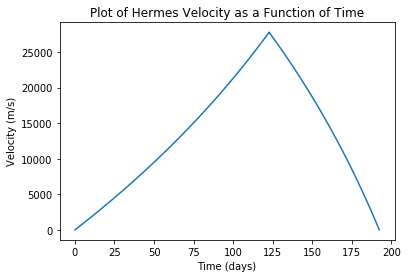

In [15]:
plt.plot(RHermes_t,RHermes_v)
plt.title('Plot of Hermes Velocity as a Function of Time')
plt.xlabel('Time (days)')
plt.ylabel('Velocity (m/s)')

Looking at this graph we see that, by taking the decreasing mass into account, we've reduced the time to mars by an additional 53 days! However, there is one hitch in this simulation: **the final mass of the spacecraft is actually less than when it started** (remember, we started with 126 metric tons of fuel and 110 tons of spaceship). So, in the current simulation, the crew seems to have burned up about 34 additional tons of spacecraft to make it to Mars. It seems that in order to make this journey you would have to have more like 160 tons of fuel and 76 tons of spacecraft.

## Conclusion: Ion Drives Rock! (with the right fuel load, and until you encounter gravity...)

Combining all three scenarios into a sigle graph, we get:

Text(0,0.5,'Velocity (m/s)')

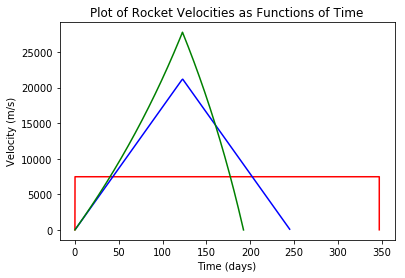

In [16]:
plt.plot(BFR_t,BFR_v,'r',Hermes_t,Hermes_v,'b',RHermes_t,RHermes_v,'g')
plt.title('Plot of Rocket Velocities as Functions of Time')
plt.xlabel('Time (days)')
plt.ylabel('Velocity (m/s)')

From this graph, we can see that the ion drive delivers even better performance than our previous constant acceleration assumption. In the "constant thrust" ion drive scenario (where the mass of the rocket decreases while the thrust stays constant), Hermes arrives at Mars in 192 days, over 50 days ahead of the "constant acceleration" ion drive case. This shorter trip time further reduces the time of radiation exposure, amount of food and supplies that must be carried on board. Additionally, the acceleration in the ion drive scenairos are far smaller and therefore more comfortable than the accelerations experienced on the conventional rocket during its short ascent and descent periods. 

However, apart from the issue of fuel vs. spacecraft mass, there is one major difficulty that we still haven't addressed: gravity. Although ion drives seem quite promising, the small amount of thrust used in this simulation would not be enough to overcome the gravitational pull of the Earth until you were far, far away from it (by our calculations, about 1.17 times the distance of the Lunar orbit). This means that in order to really reap the benefits of an ion drive, one would either need to be far away from any planets, massively increase the amount of mass ejected by the drive, combine it with another type of propulsion system (like a conventional rocket) to reach escape velocity, or rely on 2D orbital maneuvers to escape Earth's gravity well.